In [1]:
# load libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore", category=Warning)

In [2]:
# load data
df = pd.read_csv("Article_top_Data.csv")
df.head()

,Unnamed: 0,Date,StoreNumber,CashRegisterNumber,ReceiptNumber,ReceiptRowNumber,Time,ArticleNumber,ArticleName,Quantity,Month,Day,Hour,Group
0,4,2022-01-03 09:21:14,1001,1,296,5,09:21:14,419727,"GL H-Milch 3,5% 1L VLOG",1.0,1,0,9,Milch
1,6,2022-01-03 09:21:14,1001,1,296,7,09:21:14,999999998025,Pfandartikel (Tandem) - EW,1.0,1,0,9,Pfandartikel
2,7,2022-01-03 09:21:14,1001,1,296,8,09:21:14,435066,Schlaufentragetasche ST,1.0,1,0,9,Schlaufentragetasche ST
3,19,2022-01-03 09:25:34,1001,1,300,1,09:25:34,421791,BO-Laugenbreze 1ST,1.0,1,0,9,BO-Laugenbreze 1ST
4,20,2022-01-03 09:25:34,1001,1,300,2,09:25:34,421791,BO-Laugenbreze 1ST,1.0,1,0,9,BO-Laugenbreze 1ST


In [3]:
df['ArticleName'].unique()

array(['GL H-Milch 3,5% 1L VLOG', 'Pfandartikel (Tandem) - EW',
       'Schlaufentragetasche ST', 'BO-Laugenbreze 1ST',
       'Avocado vorgereift ST', 'VL Eier BH 10ST ',
       'GL H-Milch1,5%1L VLOG', 'M.I. Mozzarella oGt 125g', 'Gurken ST',
       'BO-Schnittbroetchen 1ST', 'GL Sahne 30% 200g VLOG',
       'Pfandartikel (Tandem) - MW', 'BO-Kaiserbroetchen 65g',
       'Bananen Lose', 'Zeitschriften 7%', 'Kiwi Gruen ST',
       'AugustinerHellMW1x0,5LFL', 'SammelNr. Lose Backwaren',
       'BO-Schnittbr.1ST', 'BO-Kaiserbroetchen 1ST'], dtype=object)

In [4]:
# # group by date, calculate quantity
# df['Day'] = df['Date'].map(lambda x: 1 if len(pd.bdate_range(x, x)) else 0 )

# # group by time, calculate quantity
# df['Hour'] = df['Hour'].map(lambda x: 0 if int(x)>=5 and int(x)<=8
#                                             else 1 if int(x)>=9 and int(x)<=12
#                                             else 2 if int(x)>=13 and int(x)<=16
#                                             else 3)

# # group month by seasons
# df['Month'] = df['Month'].map(lambda x: 0 if int(x)>=3 and int(x)<=5 
#                                             else 1 if int(x)>=6 and int(x)<=8 
#                                             else 2 if int(x)>=9 and int(x)<=11
#                                             else 3)
df.head()

,Unnamed: 0,Date,StoreNumber,CashRegisterNumber,ReceiptNumber,ReceiptRowNumber,Time,ArticleNumber,ArticleName,Quantity,Month,Day,Hour,Group
0,4,2022-01-03 09:21:14,1001,1,296,5,09:21:14,419727,"GL H-Milch 3,5% 1L VLOG",1.0,1,0,9,Milch
1,6,2022-01-03 09:21:14,1001,1,296,7,09:21:14,999999998025,Pfandartikel (Tandem) - EW,1.0,1,0,9,Pfandartikel
2,7,2022-01-03 09:21:14,1001,1,296,8,09:21:14,435066,Schlaufentragetasche ST,1.0,1,0,9,Schlaufentragetasche ST
3,19,2022-01-03 09:25:34,1001,1,300,1,09:25:34,421791,BO-Laugenbreze 1ST,1.0,1,0,9,BO-Laugenbreze 1ST
4,20,2022-01-03 09:25:34,1001,1,300,2,09:25:34,421791,BO-Laugenbreze 1ST,1.0,1,0,9,BO-Laugenbreze 1ST


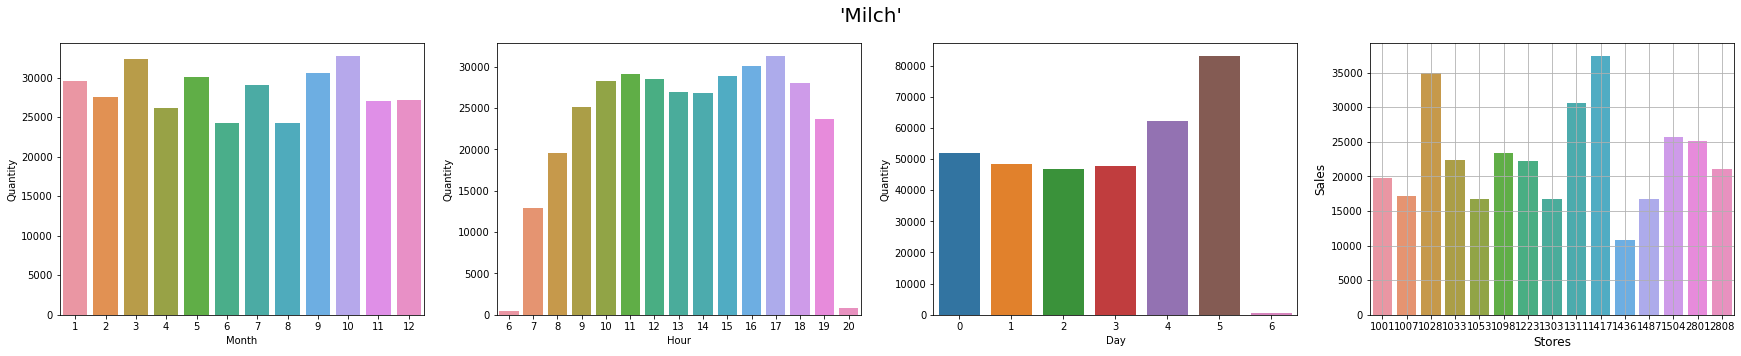

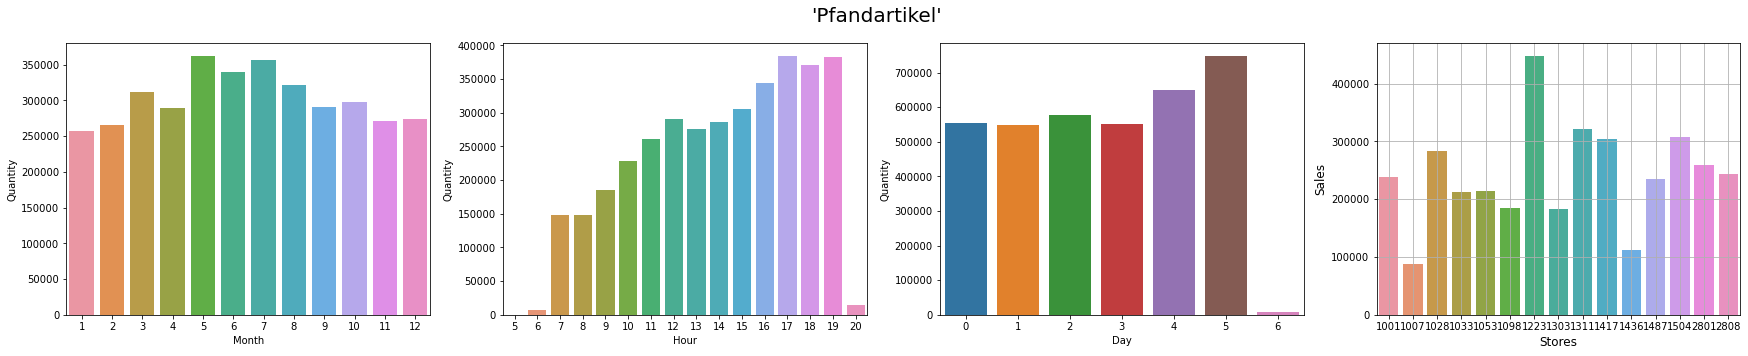

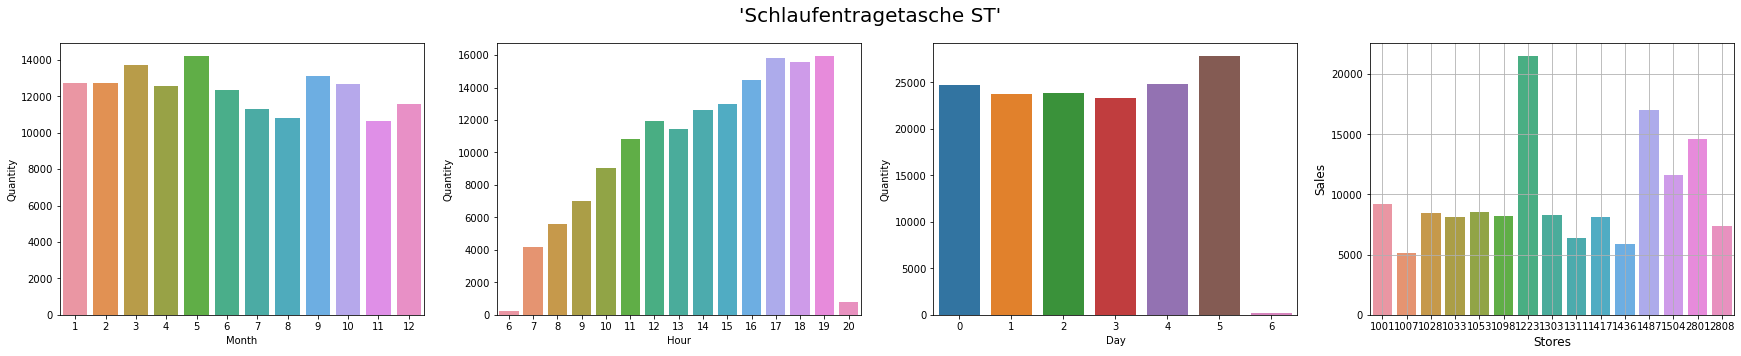

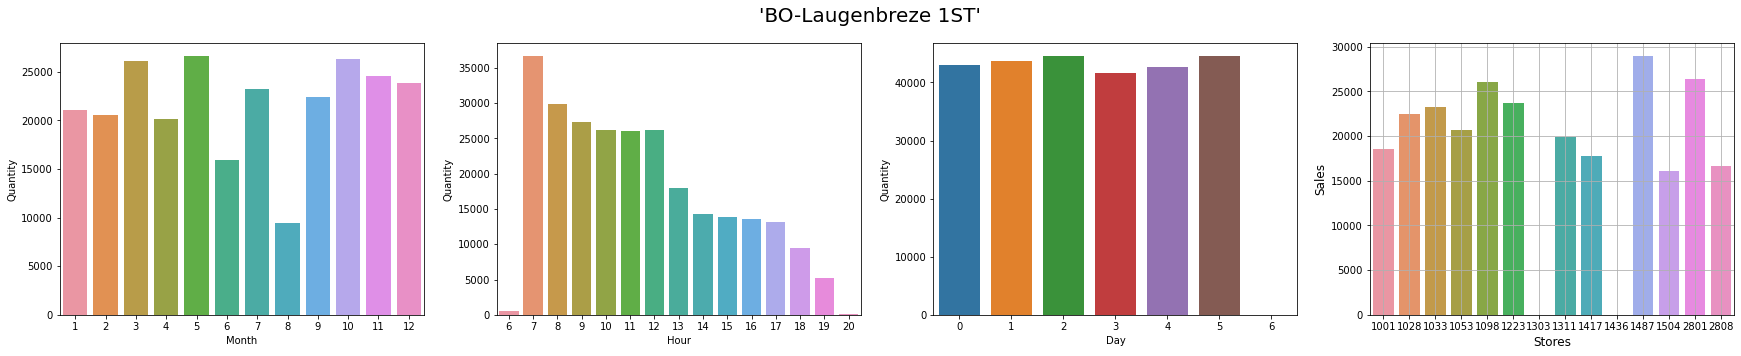

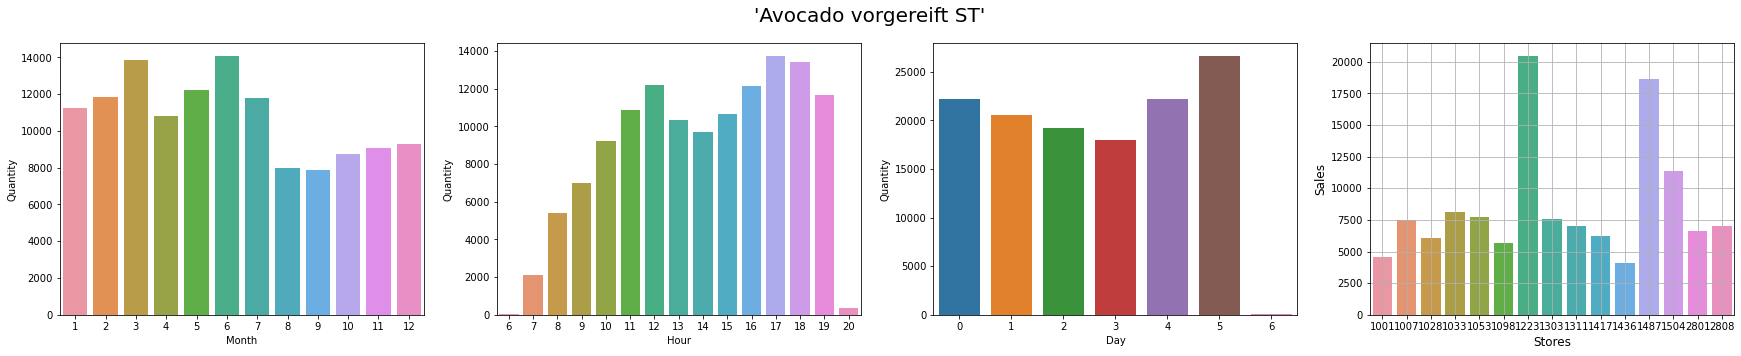

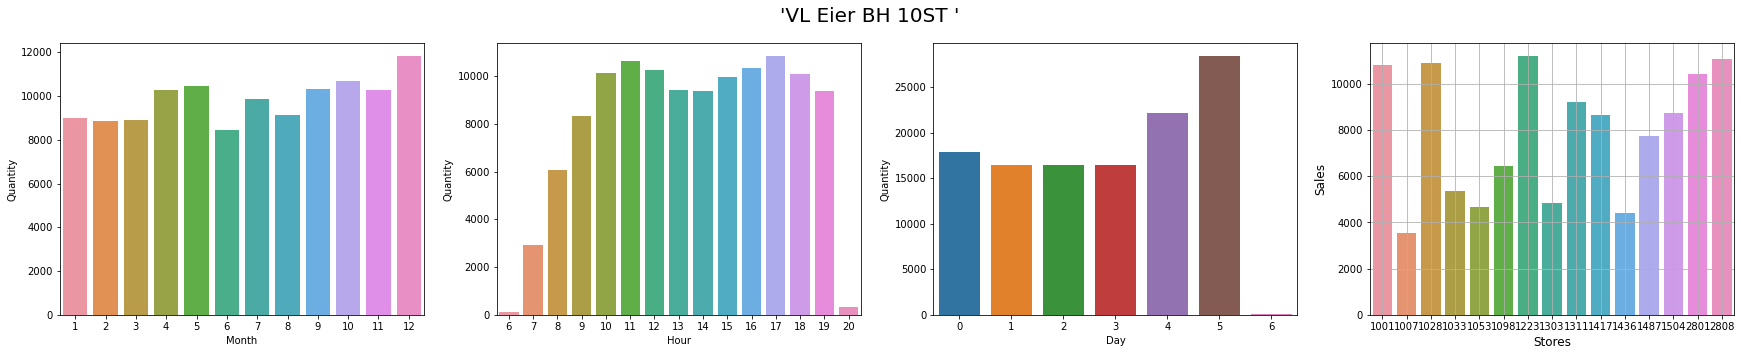

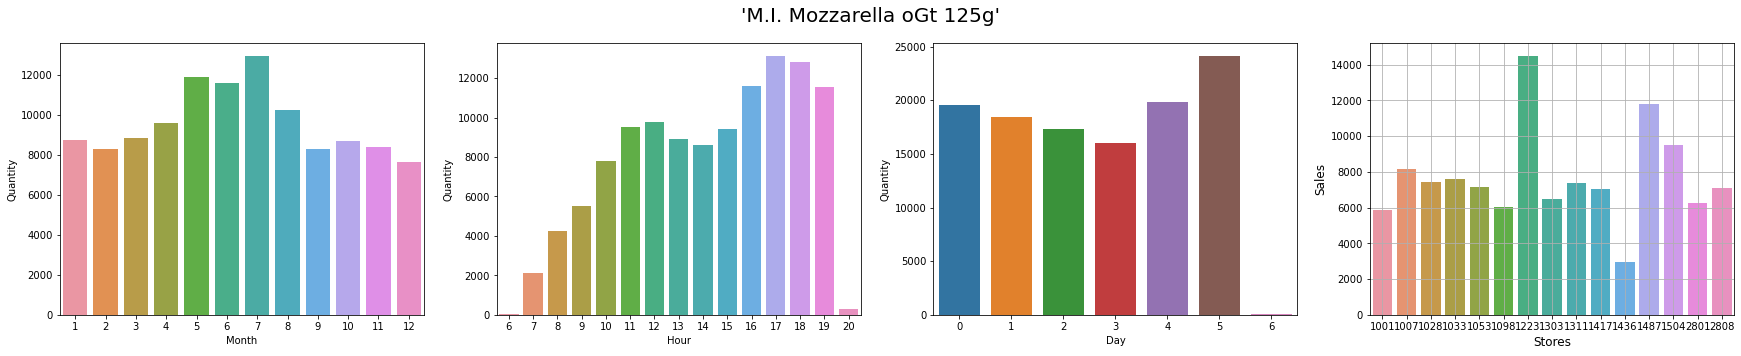

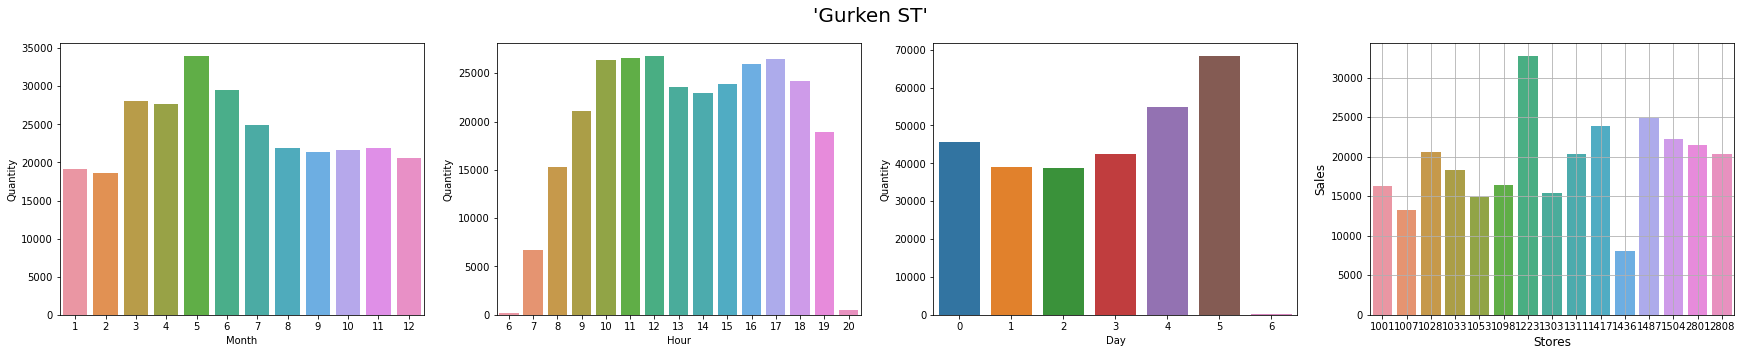

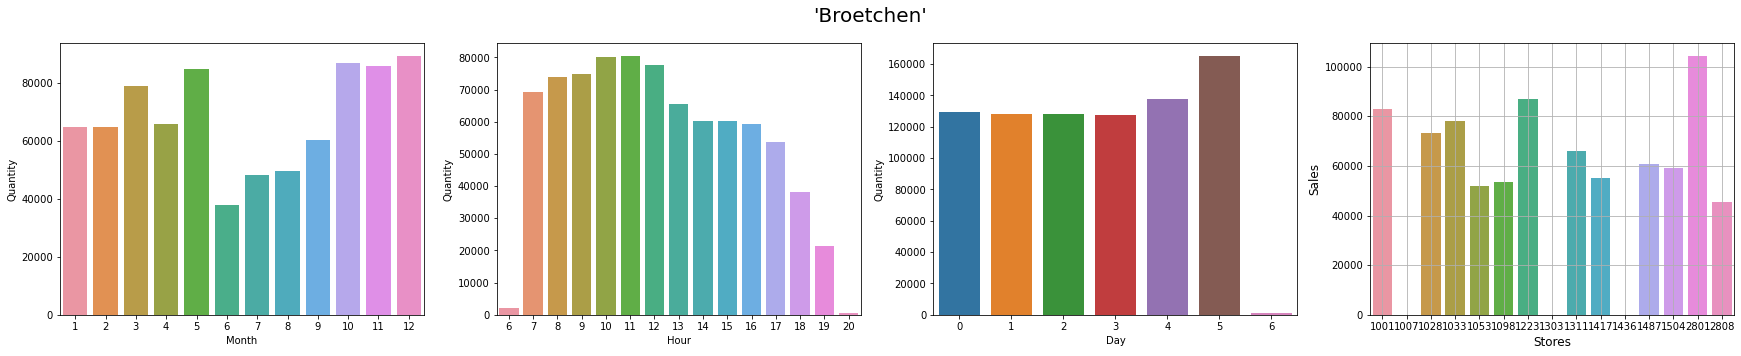

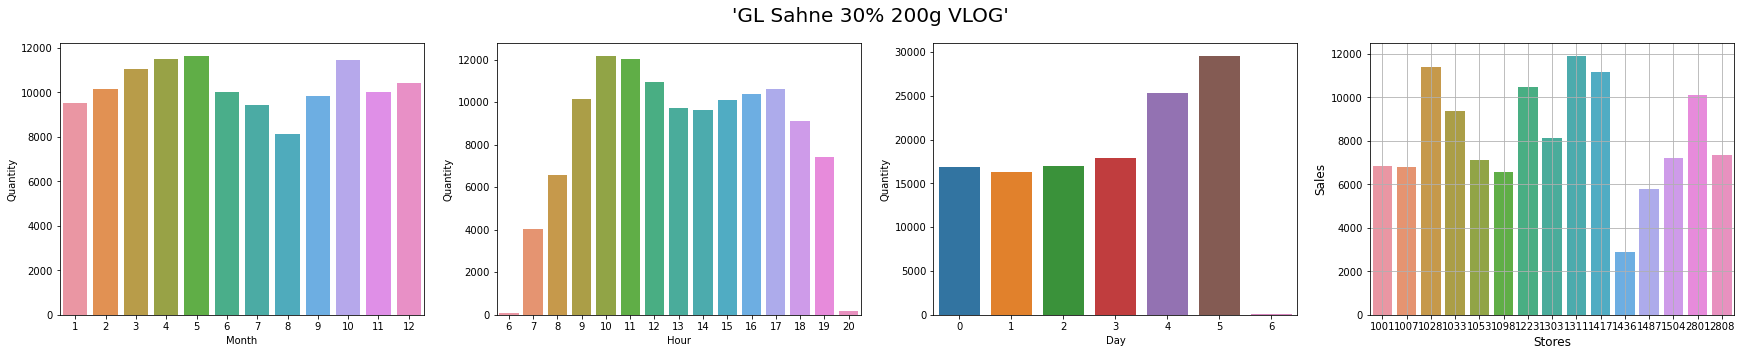

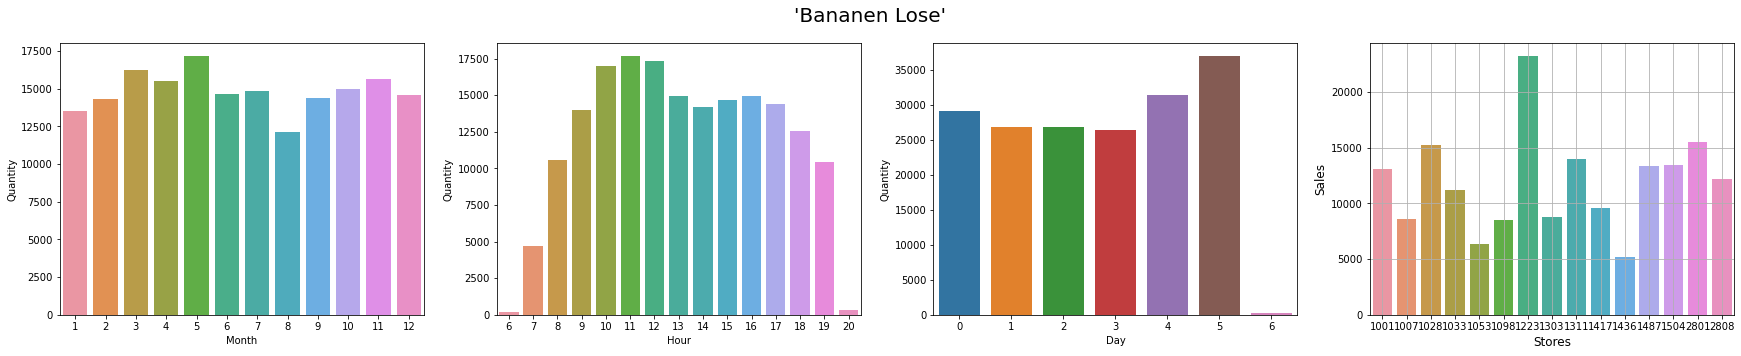

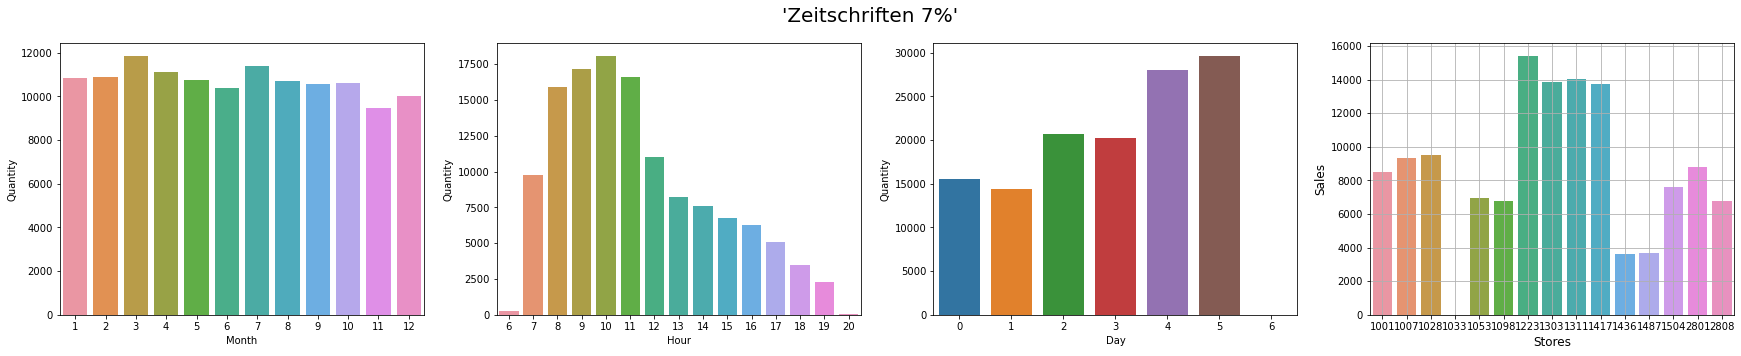

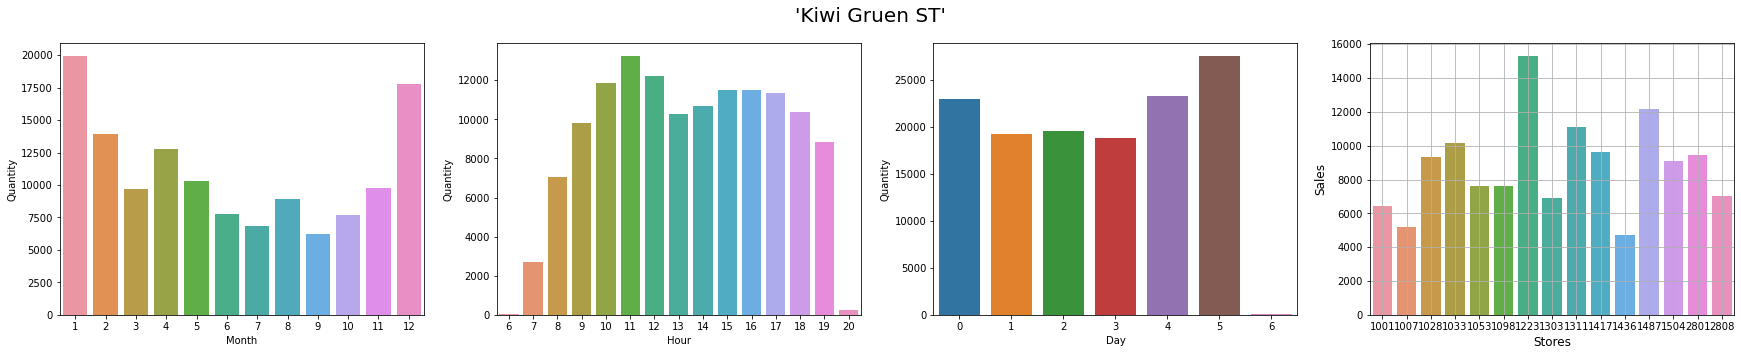

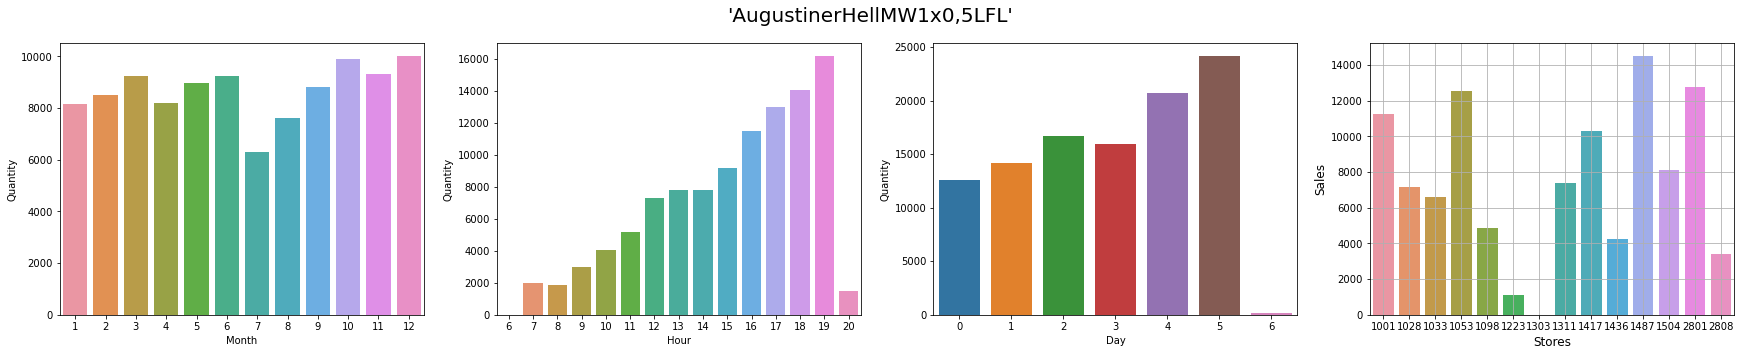

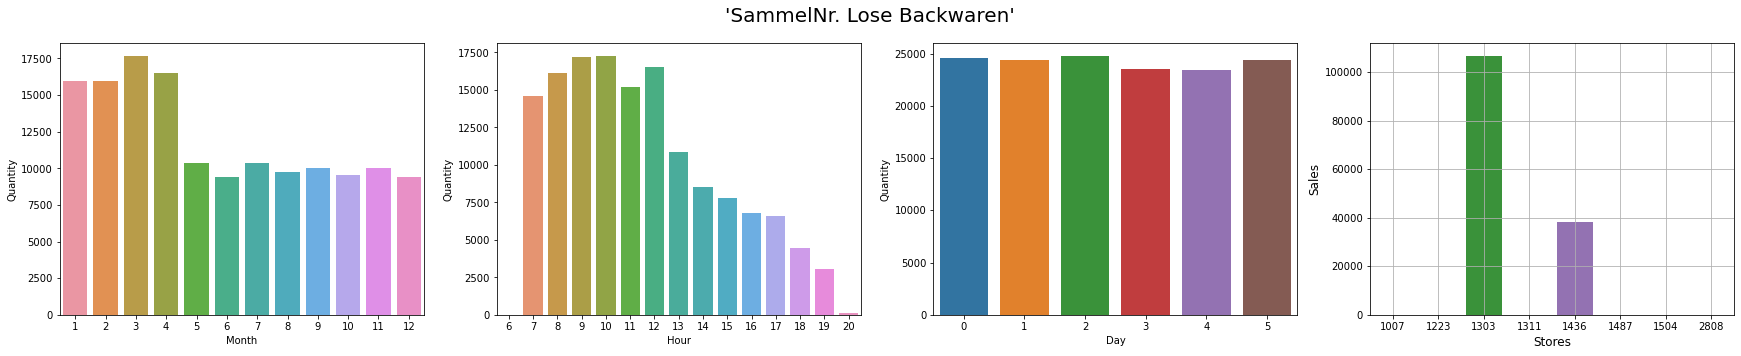

In [5]:
for article_name in list(df['Group'].unique()):
    article = df[df['Group'] == article_name].reset_index()
    # print(article.Quantity.value_counts()[:3])
    fig, ax = plt.subplots(1,4, figsize=(30,5))
    plt.suptitle(f"'{article_name}'", fontsize=20)
    ## Monthly sales
    monthly_sales = article.groupby('Month').sum()
    sns.barplot(
        y=monthly_sales['Quantity'],
        x=monthly_sales.index,
        data=monthly_sales,
        ax=ax[0])
    plt.ylabel("Sales", fontsize=12)
    plt.xlabel('Months', fontsize=12)
    # Hourly sales
    hourly_sales = article.groupby('Hour').sum()
    sns.barplot(
        ax=ax[1],
        y=hourly_sales['Quantity'],
        x=hourly_sales.index,
        data=hourly_sales)
    plt.ylabel("Sales", fontsize=12)
    plt.xlabel('Hours', fontsize=12)
    plt.grid(True)
    # Daily sales
    daily_sales = article.groupby('Day').sum()
    # if daily_sales.shape[0] == 6:
    #     daily_sales = daily_sales.append(pd.Series(), ignore_index=True)
    # daily_sales.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    sns.barplot(
        ax=ax[2],
        y=daily_sales['Quantity'],
        x=daily_sales.index,
        data=daily_sales)
    plt.ylabel("Sales", fontsize=12)
    plt.xlabel('Day of week', fontsize=12)
    plt.grid(True)
    # maximum sales by Store
    store_sales = article.groupby('StoreNumber').sum()
    sns.barplot(
        ax=ax[3],
        y=store_sales['Quantity'],
        x=store_sales.index,
        data=store_sales)
    plt.ylabel("Sales", fontsize=12)
    plt.xlabel('Stores', fontsize=12)
    plt.grid(True)
